In [195]:
import sdf_helper as sh
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi, sin
import os
from matplotlib import colors
import sdf

plt.rcParams["font.size"] = 13
plt.rcParams["figure.figsize"] = (10, 8)
import imageio as imageio
import glob

In [196]:
def getEr(lambd):
    m = 9.10938356e-31
    q = 1.60217662e-19
    c = 299792458
    w = 2 * 3.14159 * c / lambd
    return m * w * c / q

In [197]:
lambd = 1e-6
Er = getEr(lambd)
omega0 = 2 * np.pi * 299792458 / 1e-6
tau = 2*pi/omega0
nc = omega0*omega0/(4*pi*pi*81)
# dt = (20*tau/31570)
Er, omega0, nc

(3210698360819.1753, 1883651567308853.2, 1.109574294736812e+27)

In [198]:
DIR = "Den_0.001"
NX = 1000
NODE1 = 300
NODE2 = 600
ALL_FILES = glob.glob(os.path.join(DIR, "*.sdf"))
ALL_FILES.sort()

X = np.linspace(-5, 5, NX)
T = np.linspace(0, 20*tau, len(ALL_FILES))*1e15

In [199]:
lambd = 1e-6
Er = getEr(lambd)
omega0 = 2 * np.pi * 299792458 / 1e-6
tau = 2*pi/omega0
nc = omega0*omega0/(4*pi*pi*81)
# dt = (20*tau/31570)
Er, omega0, nc

(3210698360819.1753, 1883651567308853.2, 1.109574294736812e+27)

In [200]:
data = sdf.read(ALL_FILES[10])

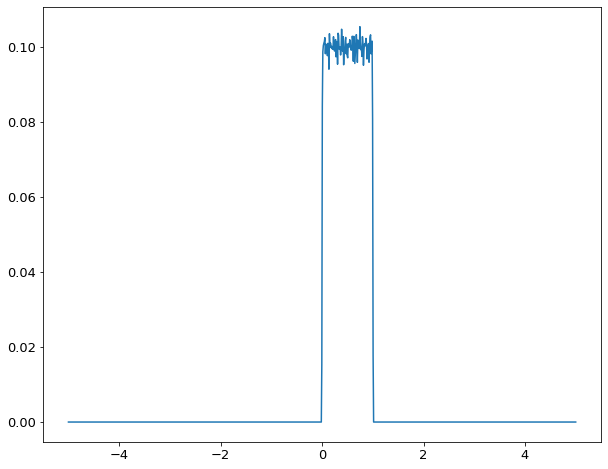

In [201]:
plt.plot(X, data.Derived_Number_Density_Electron.data/nc)

In [202]:
def get_field(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field

In [203]:
Ey1 = []
Ey2 = []
d = []
for file in ALL_FILES:
    data = sdf.read(file)
    Ey1.append(data.Electric_Field_Ey.data[NODE1])
    Ey2.append(data.Electric_Field_Ey.data[NODE2])
    d.append(data.Derived_Number_Density_Electron.data)


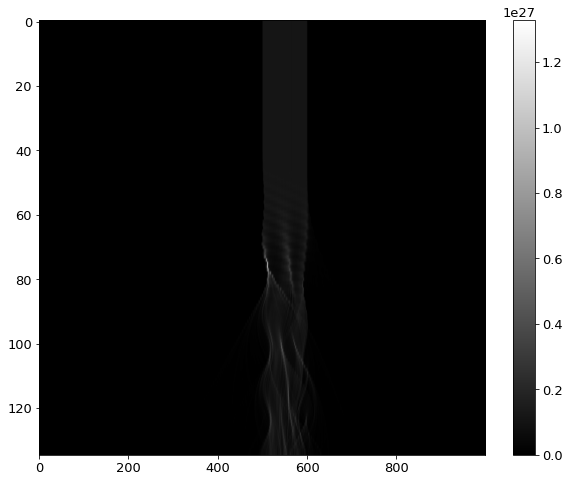

In [204]:
plt.imshow(np.array(d), aspect="auto", cmap="gray")
cmap = colors.ListedColormap("gray")
plt.colorbar(cmap=cmap);

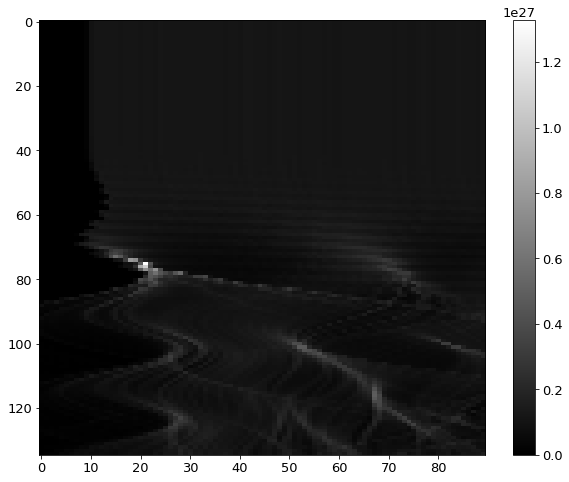

In [205]:
plt.imshow(np.array(d)[:, 490:580], aspect="auto", cmap="gray")
cmap = colors.ListedColormap("gray")
plt.colorbar(cmap=cmap);

In [226]:
def save_density(directory):
    all_files = glob.glob(os.path.join(directory, "*.sdf"))
    all_files.sort()
    D = []
    input_deck = os.path.join(directory, "input.deck")
    with open(input_deck, "r") as f:
        lines = f.readlines()
    a = lines[7].strip().split(" ")[-1]
    for i, file in enumerate(all_files):
        data = sdf.read(file)
        D.append(data.Derived_Number_Density_Electron.data)
    
    plt.imshow(np.array(d), aspect="auto", cmap="gray")
    cmap = colors.ListedColormap("gray")
    plt.colorbar(cmap=cmap)
    file_name=f"{directory}_{a}.jpg"
    file_dir = os.path.join("Images", file_name)
    # print(file_dir)
    plt.title(file_name)
    plt.savefig(file_dir)
    # plt.close()

Images/Den_0.001_1.png


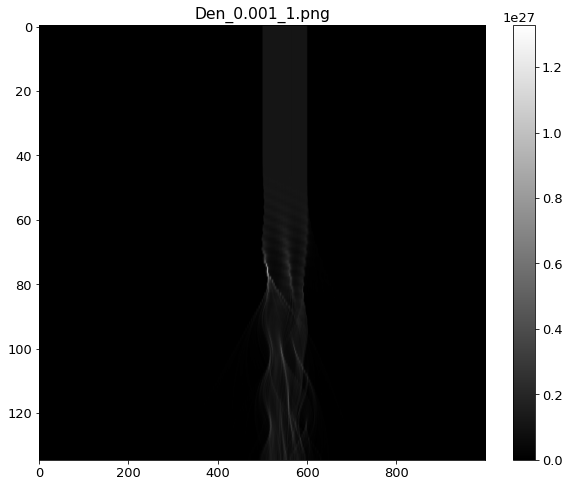

In [227]:
save_density("Den_0.001")

In [219]:
input_deck = os.path.join("Den_0.001", "input.deck")
with open(input_deck, "r") as f:
    lines = f.readlines()
lines[7].strip().split(" ")[-1]

'1'

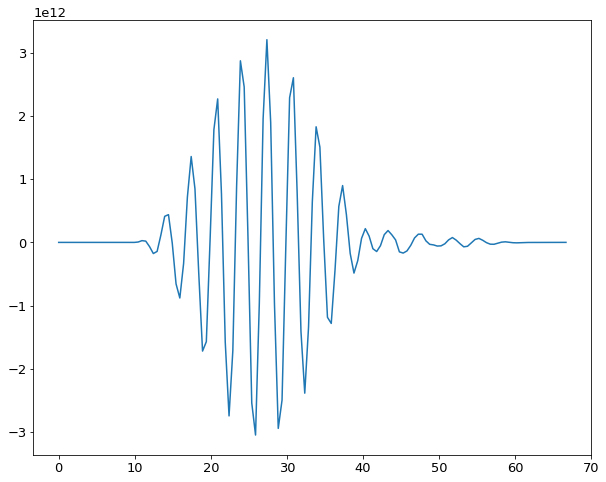

In [206]:
plt.plot(T, Ey1)

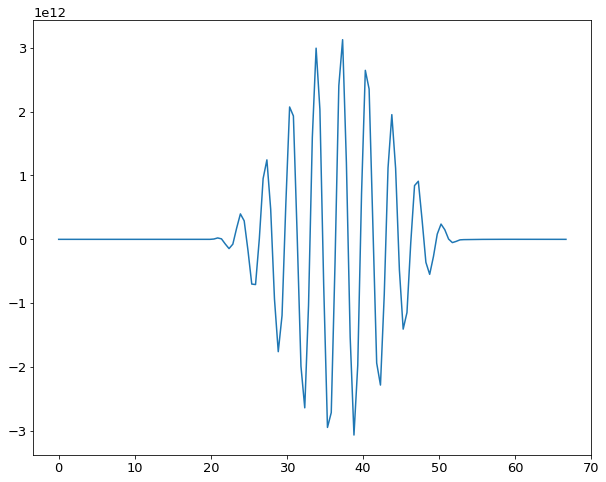

In [207]:
plt.plot(T, Ey2)

In [208]:
(np.sum(np.array(Ey1)**2)-np.sum(np.array(Ey2)**2))/np.sum(np.array(Ey1)**2)

0.012747880865664576